In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Should you read this?

Welcome to this engaging notebook - all about confidence intervals! 

Whether you're a beginner looking to gain a deeper understanding of statistical concepts or someone looking to brush up on their knowledge, you've come to the right place. In this notebook, we'll explore what confidence intervals are, how to calculate them, and what different intervals mean. And to make things even more exciting, **we'll also learn how to implement all of this in Python**. 


So buckle up and let's dive right in!


# What and Why?

Confidence intervals play a vital role in statistical analysis by providing a **measure of uncertainty and precision around estimates.** 

They assist in understanding the 
1. Reliability of estimates, 
2. Comparing groups or time periods, 
3. Supporting decision making, and 
4. Effectively communicating results. 

By accounting for variability, confidence intervals enhance the robustness and interpretability of statistical analyses. Wooh, don't beat me for this! It was not intentional to make it complex :)

# Make it easy bro!

**But the above language seems hard to understand! Lemme make it easy!**

When we study statistics, we often want to make estimates about a population based on a sample. But remember, a sample is just a smaller group of individuals or things that we study instead of the whole population. Now, we know that the characteristics of a sample might not be exactly the same as those of the whole population.

So, when we calculate something like the average or percentage using a sample, we want to have an idea of how close our estimate is to the true value of the population. That's where confidence intervals come in!

A confidence interval is like a range of values that we calculate around our estimate. It gives us an understanding of how precise our estimate is and provides a measure of how much it might vary if we were to take different samples from the same population.

# Take an example

Think of it like this: Let's say we want to know the average height of all 10th graders in a school. Instead of measuring the height of every single 10th grader, which would take a lot of time, we can measure the height of a smaller group of 10th graders, called a sample. The average height of this sample is our estimate.

Now, because we only measured a few students, our estimate might not be exactly the same as the average height of all 10th graders in the school. But with a confidence interval, we can say, "I'm 95% confident that the true average height of all 10th graders falls within this range."

The confidence interval helps us understand the precision and reliability of our estimate. It tells us how certain we can be about our estimate and allows us to compare different estimates or make decisions based on the results.

So, **confidence intervals are important because they help us make more informed conclusions about a population, understand the range of possible values around our estimate, and communicate our findings in a clear and meaningful way**. They make statistics more reliable and help us draw better insights from our data.

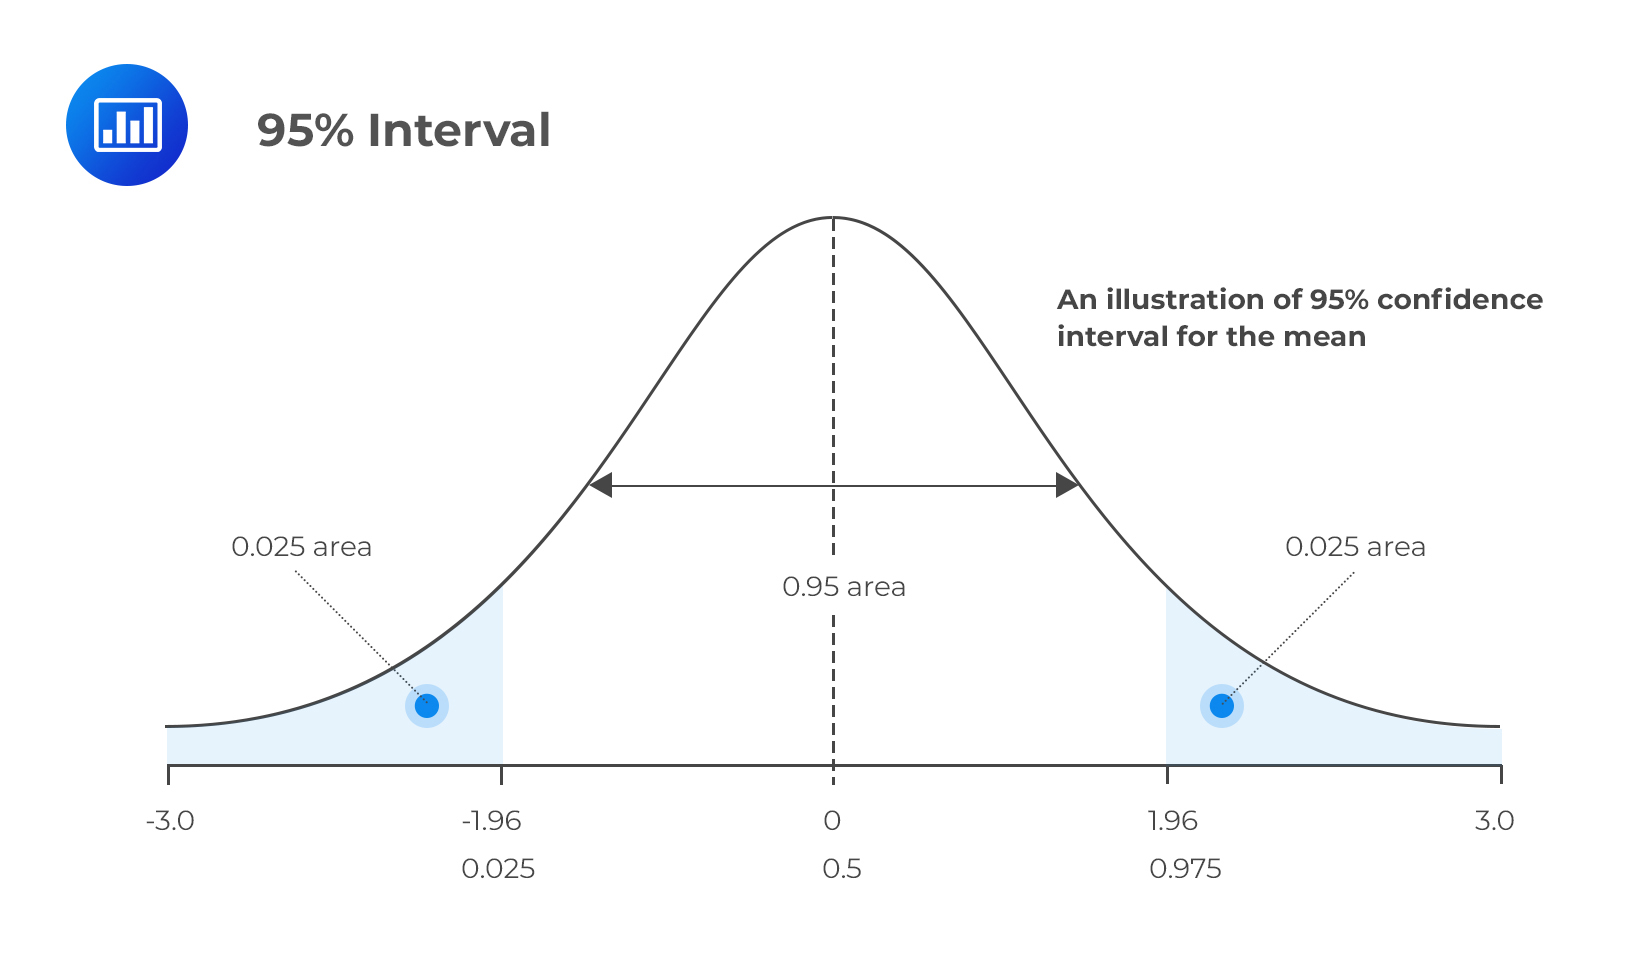

# How to calculate them?

Certainly! Let's go back to the example of estimating the average height of 10th graders in a school. Suppose you measure the heights of a sample of 30 10th graders and want to calculate a 95% confidence interval for the population mean height.

Here are the heights (in centimeters) of the 30 10th graders in your sample:
```
160, 165, 162, 158, 167, 170, 159, 163, 161, 164,
169, 166, 168, 171, 162, 160, 163, 165, 167, 170,
169, 161, 163, 166, 162, 164, 168, 159, 167, 160
```
Now, let's calculate the `95%` confidence interval for the average height of the 10th graders:

Step 1: Calculate the sample mean (x̄):

Add up all the heights in the sample and divide by the number of students:
```
x̄ = (160 + 165 + 162 + 158 + ... + 167 + 160) / 30
x̄ ≈ 164.1 cm
```

Step 2: Calculate the sample standard deviation (s):

Calculate the differences between each height and the sample mean, square them, add them up, divide by (n-1), and take the square root:
```
s = sqrt(((160-164.1)^2 + (165-164.1)^2 + ... + (160-164.1)^2) / (30-1))
s ≈ 3.41 cm
```

Step 3: Determine the desired confidence level:

We want a 95% confidence level.

Step 4: Determine the critical value:

For a 95% confidence level with a sample size of 30, the critical value can be found using statistical tables or software. Let's assume the critical value is 2.04.

Step 5: Calculate the standard error (SE):

Divide the sample standard deviation by the square root of the sample size:
```
SE = s / sqrt(n)
SE = 3.41 / sqrt(30)
SE ≈ 0.622 cm
```

Step 6: Calculate the margin of error:

Multiply the standard error by the critical value:
```
Margin of error = critical value * SE
Margin of error ≈ 2.04 * 0.622
Margin of error ≈ 1.27 cm
```

Step 7: Calculate the confidence interval:

Take the sample mean and add/subtract the margin of error to get the upper and lower ends of the interval:
```
Lower end of interval = x̄ - Margin of error
Lower end of interval ≈ 164.1 - 1.27
Lower end of interval ≈ 162.83 cm

Upper end of interval = x̄ + Margin of error
Upper end of interval ≈ 164.1 + 1.27
Upper end of interval ≈ 165.37 cm
```
The 95% confidence interval for the average height of the 10th graders is approximately (162.83 cm, 165.37 cm). This means we can be 95% confident that the true average height of all 10th graders in the school falls within this range based on our sample data.

Pretty Awesome! Now you know the maths behind it! Let's look at python implementation of the same!

In [2]:
import numpy as np
import scipy.stats as stats

# Generating a sample dataset

t= np.random.seed(42)  

# Setting the random seed for reproducibility
# In this line, we set the random seed to 42 using the np.random.seed() function from the NumPy library. 
# Setting the random seed ensures that every time you run the code, you'll get the same set of random numbers. 
# This is useful for reproducibility, meaning that if you or someone else runs the code with the same seed, you'll all get the same results.
# It's especially helpful when you want to share your code or reproduce your analysis.

print(t)

# It'll print none becuase it is not giving any output instead it is 'assigning' the seed to 42. Just this!!


None


In [3]:

sample_data = np.random.normal(loc=10, scale=2, size=100)  
print(sample_data)
# Generating a sample of 100 data points from a normal distribution


[10.99342831  9.7234714  11.29537708 13.04605971  9.53169325  9.53172609
 13.15842563 11.53486946  9.06105123 11.08512009  9.07316461  9.06854049
 10.48392454  6.17343951  6.55016433  8.87542494  7.97433776 10.62849467
  8.18395185  7.1753926  12.93129754  9.5484474  10.13505641  7.15050363
  8.91123455 10.22184518  7.69801285 10.75139604  8.79872262  9.4166125
  8.79658678 13.70455637  9.97300555  7.88457814 11.64508982  7.5583127
 10.41772719  6.08065975  7.3436279  10.39372247 11.47693316 10.34273656
  9.76870344  9.39779261  7.04295602  8.56031158  9.07872246 12.11424445
 10.68723658  6.47391969 10.64816794  9.22983544  8.646156   11.22335258
 12.06199904 11.86256024  8.32156495  9.38157525 10.66252686 11.95109025
  9.04165152  9.62868205  7.78733005  7.60758675 11.62505164 12.71248006
  9.85597976 12.0070658  10.72327205  8.70976049 10.72279121 13.07607313
  9.92834792 13.12928731  4.76050979 11.64380501 10.17409414  9.4019853
 10.18352155  6.02486217  9.56065622 10.71422514 12.95

In this line, we generate a sample dataset using the np.random.normal() function from NumPy. The np.random.normal() function allows us to draw random numbers from a normal distribution.

Here's what the function arguments mean:

* loc=10: This sets the mean of the normal distribution to 10. So the data will be centered around 10.

* scale=2: This sets the standard deviation of the normal distribution to 2. It determines how spread out the data points will be around the mean.

* size=100: This specifies the size of the sample dataset we want to generate. In this case, we generate 100 data points.

Overall, this code sets the random seed for reproducibility and generates a sample dataset of 100 data points drawn from a normal distribution with a mean of 10 and a standard deviation of 2. This sample dataset will be used for calculating the confidence interval in the subsequent steps of the code.

# Calculate mean and standard deviation of sample

In [4]:
"""Remember that the choice of the confidence level determines 
how wide or narrow the confidence interval will be. Higher confidence levels (e.g., 95% or 99%) 
result in wider intervals,reflecting increased certainty but with a trade-off of a larger range 
of plausible values."""

confidence_level = 0.95  # Specifying the desired confidence level. Here we want to calculate 95% interval so 0.95.

sample_mean = np.mean(sample_data)  # Calculating the sample mean

sample_std = np.std(sample_data, ddof=1)  # Calculating the sample standard deviation
sample_size = len(sample_data)  # Calculating the sample size

print(sample_size)
print(sample_mean)
print(np.median(sample_data))


100
9.792306965211813
9.746087416440576


# Critical Value and Margin of error

The margin of error is a measure of the uncertainty or variability associated with estimating a population parameter from a sample. In the context of a confidence interval, the margin of error represents the maximum amount by which the sample estimate (such as the sample mean) is expected to deviate from the true population parameter.

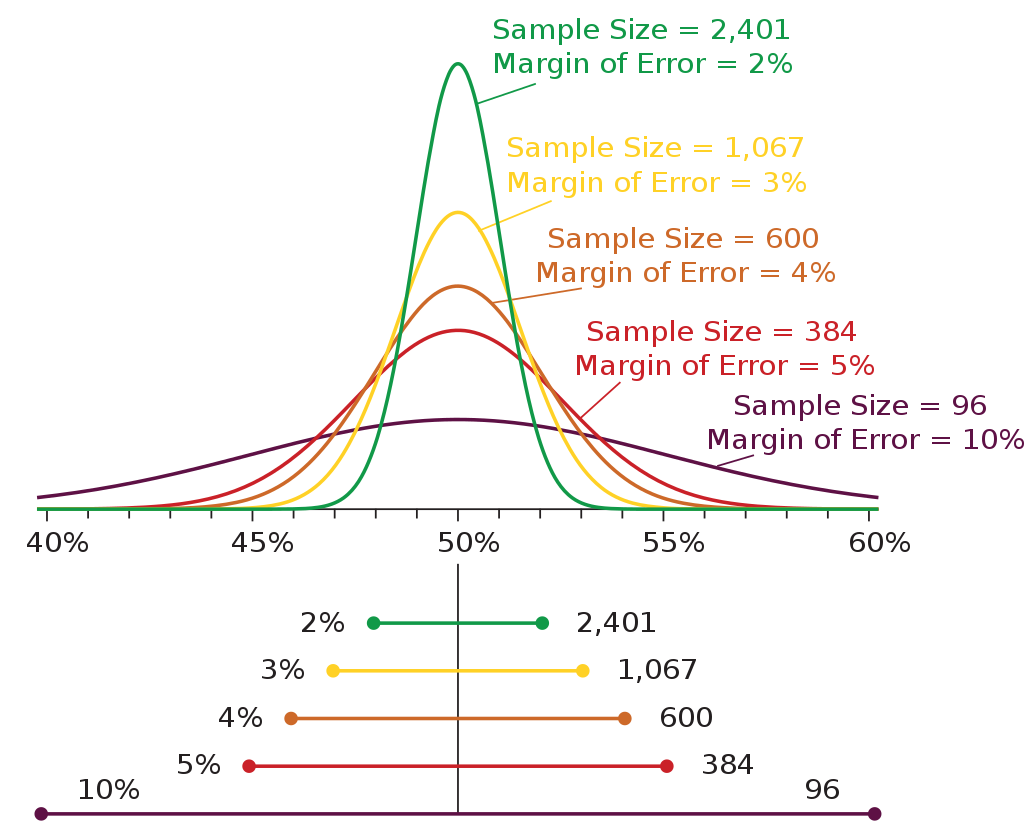

Here's the code we are using to find the margin of error but let's understand that code first.

In the context of confidence intervals, **the ppf()** function is used to determine the critical value associated with a specific confidence level. It allows us to find the value on the x-axis of the distribution that corresponds to a particular cumulative probability. This critical value is used to define the boundaries of the confidence interval.

In the code snippet we have, the stats.t.ppf() function is used to calculate the critical value from the t-distribution. The ppf() function takes two arguments: the desired cumulative probability (such as (1 + confidence_level) / 2) and the degrees of freedom (df=sample_size - 1).

By specifying the cumulative probability, the ppf() function returns the corresponding critical value from the t-distribution. This critical value is then used to calculate the margin of error or determine the boundaries of the confidence interval.


* (sample_std / np.sqrt(sample_size)): This part calculates the standard error of the mean. The standard error is a measure of the uncertainty associated with estimating the population mean from the sample mean. It is calculated by dividing the sample standard deviation (sample_std) by the square root of the sample size (np.sqrt(sample_size)).

In [5]:
std_error = sample_std /np.sqrt(sample_size)
print(std_error)

0.18163368560156015


# Calculating Critical Value

Now, this question should come in your mind that what is this critical value and why are we using it here?

Understanding critical values is important in statistical inference as they help determine the thresholds for decision-making and provide a basis for evaluating the evidence in support of hypotheses or estimating population parameters.

In hypothesis testing, the critical value helps determine the cutoff point beyond which the observed test statistic leads to the rejection of the null hypothesis. The critical value is compared to the calculated test statistic to make a decision regarding the hypothesis.

It is associated with a chosen significance level or confidence level, which determines the threshold for accepting or rejecting a statistical hypothesis or establishing the range of plausible values for a population parameter.

We need to attend stats class after reading this now :) It's not hard but important to know so make sure you surf internet and grasp the concept.



In [6]:
critical_value = stats.t.ppf((1+confidence_level)/2, df=sample_size-1)
print(critical_value)

1.9842169515086827


In [7]:
# Calculating the margin of error by mutiplying critical value and standard error.
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1) * (sample_std / np.sqrt(sample_size))
print(margin_of_error)


0.3604006379356142


In [8]:
# Calculating the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Printing the results
print(f"Sample mean: {sample_mean:.2f}")
print(f"Confidence interval: [{lower_bound:.2f}, {upper_bound:.2f}]")


Sample mean: 9.79
Confidence interval: [9.43, 10.15]


# Important note

**Different confidence intervals convey different levels of precision and confidence in statistical estimation.** 

The width of the confidence interval is influenced by factors such as the sample size, variability of the data, and chosen level of confidence.

Higher Confidence Level: Increasing the confidence level, such as moving from a 90% confidence interval to a 95% confidence interval or a 99% confidence interval, generally leads to wider intervals. This is because higher confidence levels require a larger range of plausible values to be included. However, they also provide a higher level of confidence in capturing the true parameter value.

Lower Confidence Level: On the other hand, decreasing the confidence level, such as moving from a 95% confidence interval to a 90% confidence interval, tends to result in narrower intervals. Lower confidence levels allow for a smaller range of plausible values but come with a reduced level of confidence in capturing the true parameter value.

# Cheers!

So that's how we can find confidence interval in python. You can run this code and observe how the confidence interval changes as you modify the confidence level or generate different sample datasets.